# Load Some Data and Plot It

In this short tutorial, we will experiment with loading some basic data and taking a look.

First things first... load all the great modules we'll need.

In [17]:
# Load numpy
import numpy as np
# Enable interactive plotting in the notebook
%matplotlib notebook
# Import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

There should be a file in the same directory as the jupyter notebook called "WorldPopulation.csv" which was downloaded from <a href="https://ourworldindata.org/world-population-growth">this URL</a>. Before we try to load this data, we should look at it. This might take the form of opening it in Atom, or some other text editor. However, there is a nice shell command called "head" that will let you see the header of a file directly from the command line

Shell commands can be run from a jupyter notebook using the special character "!" which should precede the command.

In [18]:
# This shell command shows you the top 10 lines of a file
!head WorldPopulation.csv

,Year,Population
0,-10000,2431214.0209999997
1,-9999,2432196.403
2,-9998,2433179.051
3,-9997,2434161.964
4,-9996,2435145.144
5,-9995,2436128.589
6,-9994,2437112.3
7,-9993,2438096.277
8,-9992,2439080.5209999997


Ok. It looks like there are three columns of data. The first line tells you what is in each column. The first column looks like an index column. Columns 2 and 3 look like year and population, respectively. 

There is a very simple method in numpy called <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html">loadtxt</a> which will allow you to read a simple text file. Here we will need to skip the first row and specify that the delimiter is a comma. The last keyword allows you to "unpack" the three columns of data into individual variables. Otherwise the data would be a big matrix.

In [19]:
index,year,population = np.loadtxt('WorldPopulation.csv',skiprows=1,delimiter=',',unpack=True)

Let's see how many rows of data the file has by using the built-in python function "len()"

In [20]:
len(index)

12016

Of course, if the first column is truly an index, we can look at the last value and see how many rows of data we have. Python allows negative indices, which are interpreted as moving backward from the end of the array (cute!).

In [21]:
index[-1]

12015.0

There is another (much easier, actually) way to load data from a csv file that I'd like to introduce you to. It is a method in pandas called <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html">read_csv</a>. This is an unbelievably flexible method that loads the data into a pandas <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html">DataFrame</a>, which is very flexible and powerful data structure. Might as well get familiar with them now.

In [22]:
data = pd.read_csv('WorldPopulation.csv',index_col=0)

We can take a look at the data in this form by simply typing the name of the DataFrame.

In [23]:
data

,Year,Population
0,-10000,2.431214e+06
1,-9999,2.432196e+06
2,-9998,2.433179e+06
3,-9997,2.434162e+06
4,-9996,2.435145e+06
...,...,...
12011,2011,7.013427e+09
12012,2012,7.097500e+09
12013,2013,7.181715e+09
12014,2014,7.265786e+09


Pandas DataFrames are a whole world that we will get into later. For now, know that you can extract each column of data by using the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_numpy.html">to_numpy()</a> method. 

In [24]:
year = data['Year'].to_numpy()
population = data['Population'].to_numpy()

Notice that we seamlessly overwrote varibles with the same name as before. This is worth a pause as it shows the power, flexibility, and _danger_ of a high level language like python

More on this later. For now, let's move on.

Let's make a basic plot of the data. The plot function in matplotlib is extensive (see the manual pages <a href="https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html">here</a>). However, it is built so that it is easy to use if you want to take a quick look at some data (exactly what we want!). The following commands will produce an interactive plot in the window below. Play around with the view. But, be sure to hit the power symbol at the top of the plot after you're done fiddling.

<IPython.core.display.Javascript object>


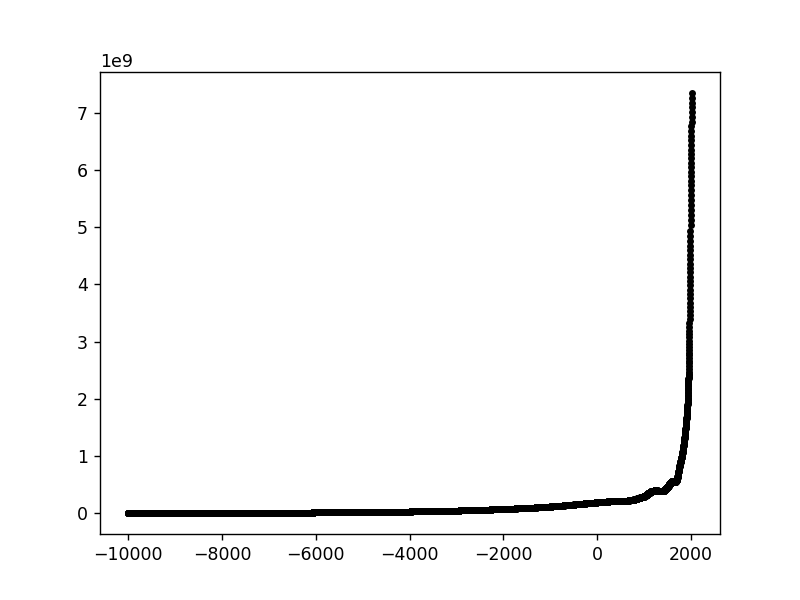

In [25]:
plt.figure(1)
plt.plot(year,population,color='black',marker='.',linestyle='-')

BTW, the python language is all about efficiency, and so many of the modules written for python have built in shortcuts. In this example, you can achieve the same results with the following plot commands:

<IPython.core.display.Javascript object>


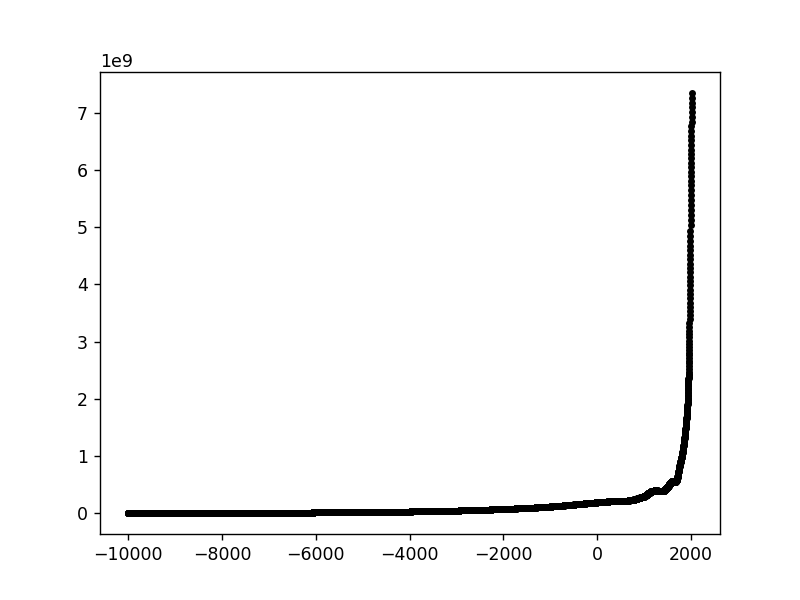

In [26]:
plt.figure(2)
plt.plot(year, population,'k.-')

But what if you don't care about prehistoric times and just want to plot the last 50 years? We can select out data in a myriad of ways. Here are a few examples.

<IPython.core.display.Javascript object>


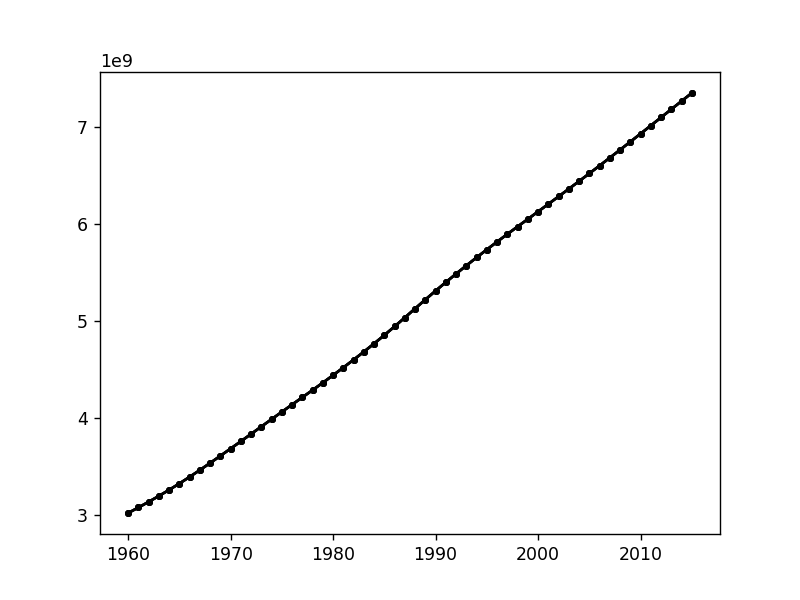

In [12]:
inds = year >= 1960
plt.figure(3)
plt.plot(year[inds],population[inds],'k.-')

This is a pretty steep plot (given that the vertical axis is given in billions!). Let's plot it on a log scale to see if it is exponential

<IPython.core.display.Javascript object>


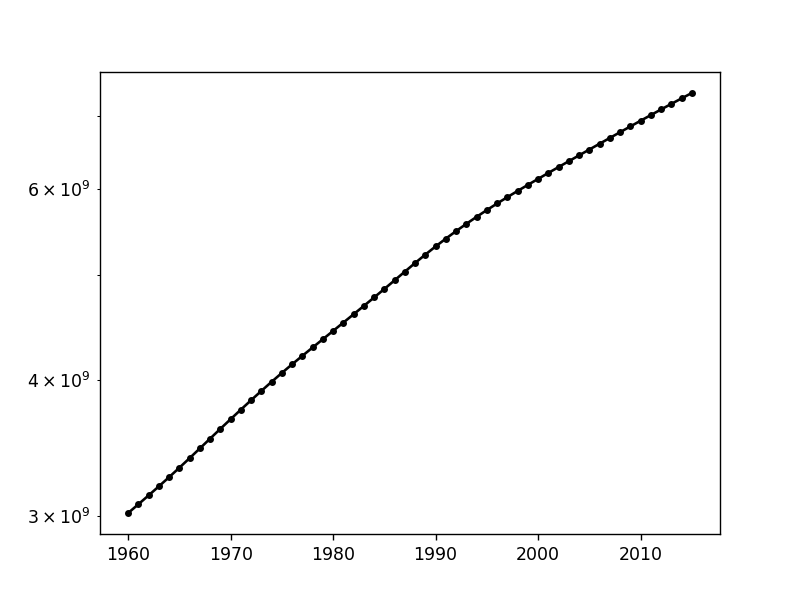

In [13]:
plt.figure(4)
plt.plot(year[inds],population[inds],'k.-')
plt.yscale('log')

Interesting! It appears that the world population is on an exponential rise since the 1960's. However, the exponential index seems to have changed around the 1990's to a slower rate. 

What about the full data set? Let's also pretty up our plot with some labels and titles...

<IPython.core.display.Javascript object>


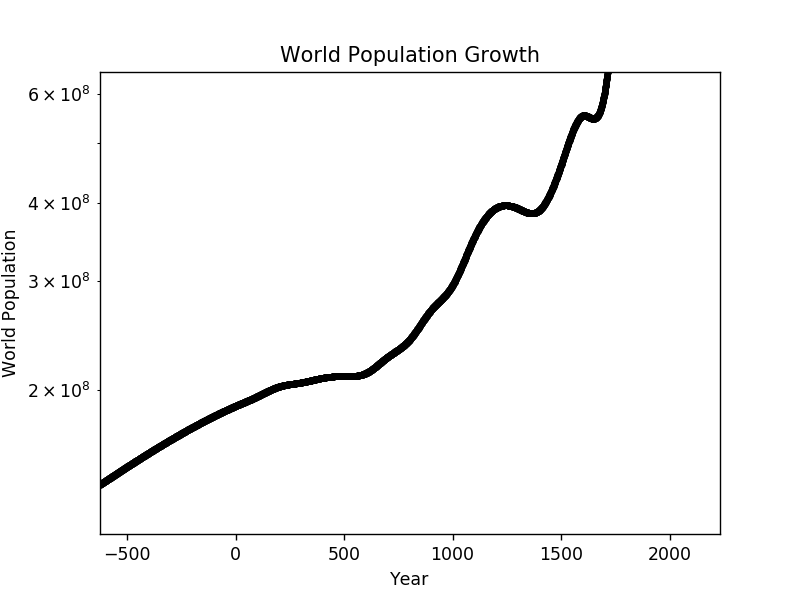

Text(0.5, 1.0, 'World Population Growth')

In [14]:
plt.figure(5)
plt.plot(year,population,'k.-')
plt.yscale('log')
plt.xlabel('Year')
plt.ylabel('World Population')
plt.title('World Population Growth')

Fascinating! There are several different epochs of world population growth. 

## Homework
1. Use the interactive plotting feature to zero in on the epoch when the human population leveled off for the first time (looks like right near the beginning of the "Dark Ages"). Make a plot, either linear or log, that shows this time period and title it appropriately.
2. Use the interactive plotting feature to zero in on the epoch when the human population entered into the extreme growth that we are still experiencing on Earth. Make a plot, either linear or log, that shows this time period and title it appropriately.

<IPython.core.display.Javascript object>


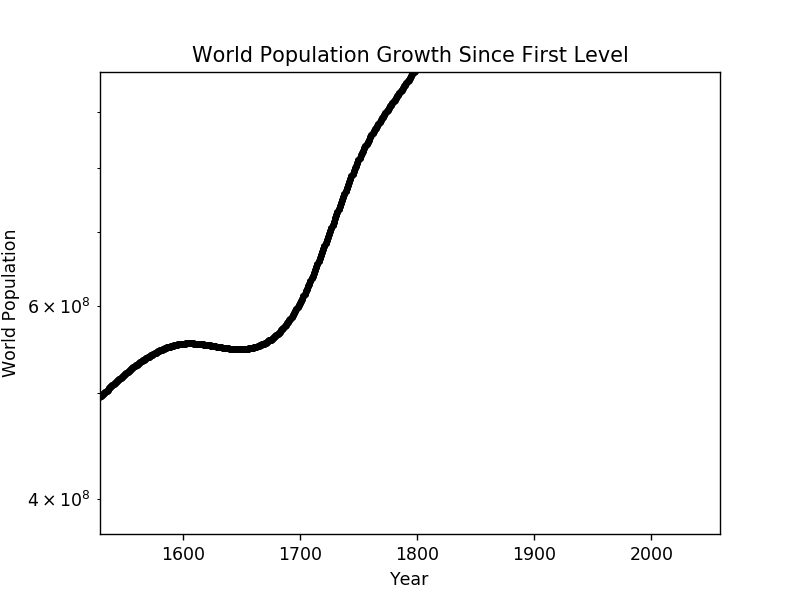

In [27]:
inds = year >= 0
plt.figure(3)
plt.plot(year[inds],population[inds],'k.-')

<IPython.core.display.Javascript object>


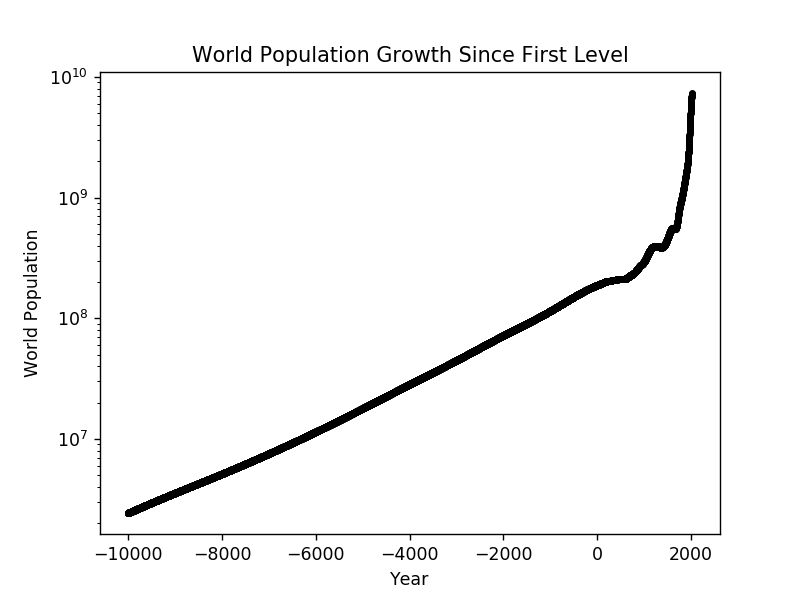

Text(0.5, 1.0, 'World Population Growth Since First Level')

In [28]:
plt.figure(5)
plt.plot(year,population,'k.-')
plt.yscale('log')
plt.xlabel('Year')
plt.ylabel('World Population')
plt.title('World Population Growth Since First Level')

In [29]:
inds = year >= 0
plt.figure(3)
plt.plot(year[inds],population[inds],'k.-')
plt.yscale('log')
plt.xlabel('Year')
plt.ylabel('World Population')
plt.title('World Population Growth Since First Level')

Text(0.5, 1, 'World Population Growth Since First Level')

<IPython.core.display.Javascript object>


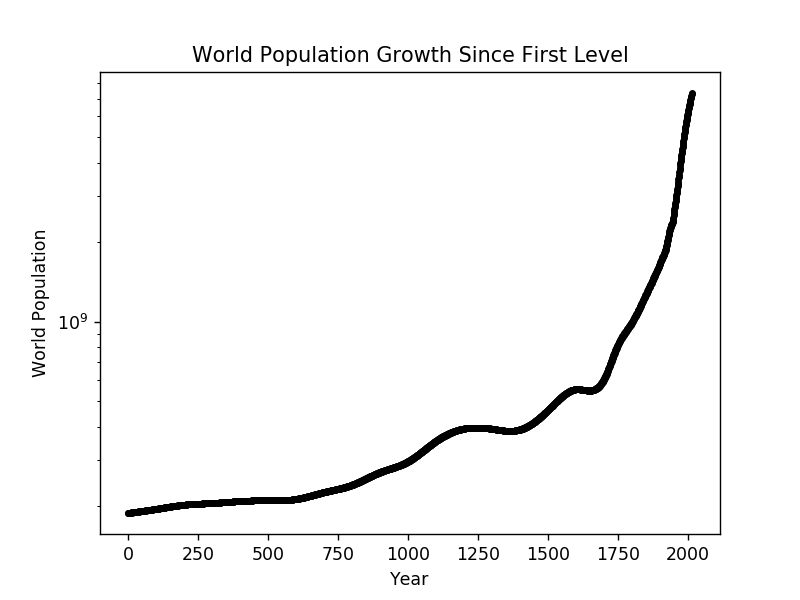

Text(0.5, 1.0, 'World Population Growth Since First Level')

In [30]:
plt.figure(6)
plt.plot(year[inds],population[inds],'k.-')
plt.yscale('log')
plt.xlabel('Year')
plt.ylabel('World Population')
plt.title('World Population Growth Since First Level')

<IPython.core.display.Javascript object>


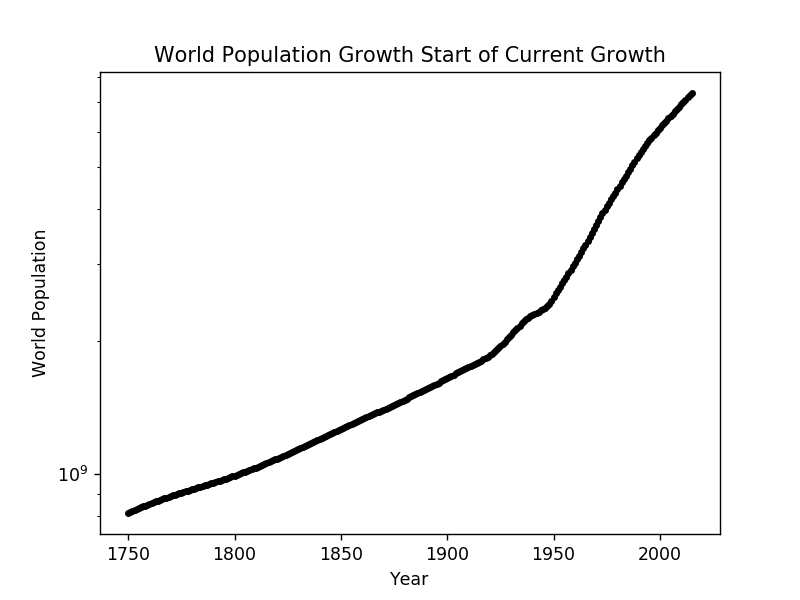

Text(0.5, 1.0, 'World Population Growth Start of Current Growth')

In [31]:
inds = year >= 1750
plt.figure(7)
plt.plot(year[inds],population[inds],'k.-')
plt.yscale('log')
plt.xlabel('Year')
plt.ylabel('World Population')
plt.title('World Population Growth Start of Current Growth')